In [136]:
import pickle
import pandas as pd
import numpy as np
import datetime
import json

pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [137]:
from FormatEvents_Functions import *

In [138]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [139]:
durations = ['0.5', '1', '2', '3', '6', '12', '24']

### UKCP18 data

### Join together lists for different ensemble members

In [140]:
events_props_dict_present = []
ems_present = ['bc005', 'bc006', 'bc007', 'bc009', 'bc010', 'bc011', 'bc012', 'bc013', 'bc015', 'bc016', 'bc017', 'bc018']
# ems_present = ['bc005']
for em in ems_present:
    if em in ['bc005', 'bc006', 'bc007',  'bc009', 'bc010', 'bc011']:
        with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Present/event_props_dict_{em}_NEW.pickle", 'rb') as handle:
            one_events_props_dict_present = pickle.load(handle)    
    else:
        with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Present/event_props_dict_{em}.pickle", 'rb') as handle:
            one_events_props_dict_present = pickle.load(handle)    
    events_props_dict_present = events_props_dict_present + one_events_props_dict_present
    
## Join into one dataframe    
present = pd.DataFrame(events_props_dict_present)
present['Climate'] = 'Present'    

In [141]:
events_props_dict_future = []
ems_future = ['bb189', 'bb195', 'bb192', 'bb198', 'bb208', 'bb225','bb222', 'bb201', 'bb204', 'bb216', 'bb219', 'bb211']
# ems_future = [ 'bb198']#,'bb195', 'bb192', 'bb208', 'bb225','bb222', 'bb201', 'bb204', 'bb216', 'bb219', 'bb211', 'bb189'] #bb195, #bb198
for em in ems_future:
    if em in ['bb198']:
        with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Future/event_props_dict_{em}_NEW.pickle", 'rb') as handle:
            one_events_props_dict_future = pickle.load(handle)    
    else:
        with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Future/event_props_dict_{em}.pickle", 'rb') as handle:
            one_events_props_dict_future = pickle.load(handle)            
    events_props_dict_future = events_props_dict_future + one_events_props_dict_future
    
## Join into one dataframe
future = pd.DataFrame(events_props_dict_future)
future['Climate'] = 'Future'

## Make a check on number of files (could shift this to the checking script)
NB - the method of searching on part1 doesnt work, because the filename only represents on of the files that is represented by that event


24529 is 19 * 1291 and is the number we expert with no part1s for one ensemble member.  
For 12 ems it becomes 24529 * 12 = 294348

### Create one dataframe containing both present and future

In [142]:
df_long = pd.concat([present, future])

# Add D variable (day of year) and date
df_long['D'] = (df_long['theta'] * 365.25) / (2 * np.pi)
df_long['date'] = df_long.apply(lambda row: date_from_D(row['D'], row['year']), axis=1)
df_long['season'] = df_long['date'].apply(get_season)

### Remove entries which are less than 1.5 hours

In [9]:
# def has_duplicates(lst):
#     return len(lst) != len(set(lst))

# # Apply the function to each row in the specified column
# df_long['has_duplicates'] = df_long['dur_for_which_this_is_amax'].apply(has_duplicates)

# # Display rows with duplicates
# rows_with_duplicates = df_long[df_long['has_duplicates']]
# rows_with_duplicates['dur_for_which_this_is_amax']

In [10]:
df_long_with_short_durations_kept = df_long.copy()

In [44]:
df_long = df_long[df_long['duration'] >=1.5]
present = present[present['duration'] >=1.5]
future = future[future['duration'] >=1.5]
# nan_rows = df_long[df_long['D50'].isna()]

### Get events all together in a dictionary

In [14]:
all_events_profiles_dict_future = {}
ems_future = ['bb189', 'bb195', 'bb192', 'bb198', 'bb208', 'bb225','bb222', 'bb201', 'bb204', 'bb216', 'bb219', 'bb211']
for em in ems_future:
    with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Future/events_dict_{em}.pickle", 'rb') as handle:
        one_events_profiles_dict_future = pickle.load(handle)    
    all_events_profiles_dict_future.update(one_events_profiles_dict_future)

In [17]:
all_events_profiles_dict_present = {}
ems_present = ['bc005', 'bc006', 'bc007', 'bc009', 'bc010', 'bc011', 'bc012', 'bc013', 'bc015', 'bc016', 'bc017', 'bc018']
for em in ems_present:
    with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Present/events_dict_{em}.pickle", 'rb') as handle:
        one_events_profiles_dict_present = pickle.load(handle)    
    all_events_profiles_dict_present.update(one_events_profiles_dict_present)

1084544

### Extract all precipitation profiles into a DataFrame

In [16]:
all_events_future = {}

for event_name, event_data in all_events_profiles_dict_future.items():
    all_events_future[event_name] = event_data['precipitation (mm)']

# Convert dictionary of events to a DataFrame
events_df_future = pd.DataFrame.from_dict(all_events_future, orient='index')

# Rename columns to indicate time steps
events_df_future.columns = [f'Time_{i}' for i in range(events_df_future.shape[1])]   

In [ ]:
# all_events_present = {}

# for event_name, event_data in all_events_profiles_dict_present.items():
#     all_events_present[event_name] = event_data['precipitation (mm)']

# # Convert dictionary of events to a DataFrame
# events_df_present = pd.DataFrame.from_dict(all_events_present, orient='index')

# # Rename columns to indicate time steps
# events_df_present.columns = [f'Time_{i}' for i in range(events_df_present.shape[1])]

# all_events_present_df = pd.DataFrame(one_events_props_dict_present)    

### Find metrics

In [134]:
# from scipy.stats import skew

# results2 = []
# for _, row in events_df_future[:100].iterrows():
#     intensities = row.dropna()  # Drop NaNs for this event
    
#     # Calculate skewness
#     asymmetry = skew(intensities)
#     tci = calculate_tci(intensities)
#     d50=calc_d50_with_interpolation(intensities)
#     # Calculate coefficient of variation (CV)
#     unevenness = np.std(intensities) / np.mean(intensities)
    
#     results2.append({'Asymmetry': asymmetry, 'Unevenness': unevenness, 'tci': tci, 'd50': d50})
    
# # Convert results to DataFrame
# results_df_future = pd.DataFrame(results)
# results_df_future['D50']=future['D50_new']
# results_df_future['duration']=future['duration']
results_df_future_no4h = results_df_future[results_df_future['duration']>12]

In [87]:
# import matplotlib.pyplot as plt
# plt.scatter(results_df_future['D50'][500000:600000],results_df_future['Unevenness'][500000:600000] )

In [131]:
# import matplotlib.pyplot as plt
# plt.scatter(results_df_future['D50'],results_df_future['tci'])

In [132]:
# third_key = list(all_events_profiles_dict_future.keys())[90]
# plt.plot(all_events_future[third_key])
# print(len(all_events_future[third_key]))

In [128]:
# results_df_future[results_df_future["tci"]==0.5]
# # results_df_future[:10]

(array([0.06214721, 0.20284159, 0.24542393, 0.29347293, 0.43117504,
        0.59039849, 0.78213414, 0.97087752, 1.19995904, 1.37184211,
        1.67699641, 1.7521485 , 1.83345777, 1.97616618, 1.96655638,
        1.8602156 , 1.79047262, 1.79093297, 1.57422334, 1.4163234 ,
        1.19489519, 1.08095864, 0.88600054, 0.81510669, 0.61589036,
        0.53337267, 0.45108516, 0.37748675, 0.3322574 , 0.21929909]),
 array([0.00970874, 0.04271845, 0.07572816, 0.10873786, 0.14174757,
        0.17475728, 0.20776699, 0.2407767 , 0.27378641, 0.30679612,
        0.33980583, 0.37281553, 0.40582524, 0.43883495, 0.47184466,
        0.50485437, 0.53786408, 0.57087379, 0.6038835 , 0.6368932 ,
        0.66990291, 0.70291262, 0.73592233, 0.76893204, 0.80194175,
        0.83495146, 0.86796117, 0.90097087, 0.93398058, 0.96699029,
        1.        ]),
 <BarContainer object of 30 artists>)

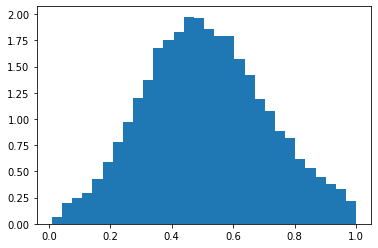

In [135]:
plt.hist(results_df_future_no4h['tci'], bins=30, density=True)

In [ ]:
results = []
for _, row in events_df_present.iterrows():
    intensities = row.dropna()  # Drop NaNs for this event
    
    # Calculate skewness
    asymmetry = skew(intensities)
    tci = calculate_tci(intensities)
    # Calculate coefficient of variation (CV)
    unevenness = np.std(intensities) / np.mean(intensities)
    
    results.append({'Asymmetry': asymmetry, 'Unevenness': unevenness, 'tci': tci})

# Convert results to DataFrame
results_df_present = pd.DataFrame(results)
print(results_df_present)

In [120]:
def calculate_tci(rainfall_intensities):
    """
    Calculate Temporal Concentration Index (TCI) based on the rainfall intensities over time.
    
    Parameters:
        rainfall_intensities (list or np.array): Rainfall intensities over the event duration.
        
    Returns:
        tci (float): Temporal Concentration Index.
    """
    
    # Convert the rainfall intensities to a numpy array for easy calculation
    rainfall_intensities = np.array(rainfall_intensities)
    
    # Calculate the cumulative rainfall over time
    cumulative_rainfall = np.cumsum(rainfall_intensities)
    
    # Calculate the total rainfall of the event
    total_rainfall = cumulative_rainfall[-1]
    
    # Calculate the proportion of total rainfall at each time step
    rainfall_proportion = cumulative_rainfall / total_rainfall
    print(rainfall_proportion)
    # Find the time step where 50% of the rainfall is reached
    half_rainfall_index = np.argmax(rainfall_proportion >= 0.5)
    print(half_rainfall_index)
    # TCI can be calculated as the time step at which half the rainfall occurs
    # Or, you could normalize it relative to the event duration
    tci = (half_rainfall_index + 1) / len(rainfall_intensities)
    
    return tci


def calc_d50_with_interpolation(sample):
    n=5
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    percentile = 0.5
    
    time_percentage = (np.arange(0, len(sample) + 1) / len(sample)) * 100
    
    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_cumulative_rainfall[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_cumulative_rainfall[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope

        return time_for_percentile

In [ ]:
import matplotlib.pyplot as plt
plt.hist(bc005['D50'], bins=50, density=True)
plt.hist(bc006['D50'], bins=50, density=True)
plt.hist(bb189['D50'], bins=50, density=True)

In [143]:
# plt.scatter(results_df['D50'],results_df['tci'] )

In [140]:
results_df['D50']=all_events_present_df['D50']
results_df.sort_values(by='D50', ascending=True)[2000:2050]

,Asymmetry,Unevenness,tci,d50,D50
11276,1.780332,1.939463,0.166667,0.000000,0.000000
69138,-0.000000,0.687048,0.500000,0.000000,0.000000
11278,-0.000000,0.968558,0.500000,0.000000,0.000000
69054,-0.000000,0.496220,0.500000,0.000000,0.000000
69051,0.705104,1.015145,0.333333,0.000000,0.000000
69048,0.000000,0.950563,0.500000,0.000000,0.000000
69042,0.000000,0.539774,0.500000,0.000000,0.000000
69040,0.000000,0.796095,0.500000,0.000000,0.000000
33787,0.000000,0.713506,0.500000,0.000000,0.000000
38048,2.088744,1.896833,0.125000,0.000000,0.000000


       Asymmetry  Unevenness      tci
0       0.353513    0.894676 0.500000
1       0.386507    0.701531 0.666667
2       1.174862    1.442593 0.800000
3       1.121174    0.639873 0.400000
4       3.652998    1.902628 0.750000
...          ...         ...      ...
92582   2.165067    1.367500 0.267241
92583  -0.515383    0.724755 0.333333
92584   0.355189    1.067905 0.250000
92585   1.457452    1.301395 0.636364
92586   0.950154    1.162040 0.400000

[92587 rows x 3 columns]


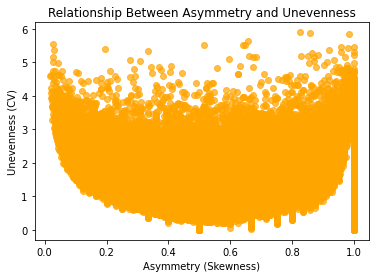

In [98]:
# from scipy.stats import skew
# import numpy as np
# import pandas as pd

# # Calculate metrics for each event
# results = []
# for _, row in events_df_future.iterrows():
#     intensities = row.dropna()  # Drop NaNs for this event
    
#     # Calculate skewness
#     asymmetry = skew(intensities)
    
#     tci = calculate_tci(intensities)
    
#     # Calculate coefficient of variation (CV)
#     unevenness = np.std(intensities) / np.mean(intensities)
    
#     results.append({'Asymmetry': asymmetry, 'Unevenness': unevenness, 'tci': tci})

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)
# print(results_df)

# # Scatter plot to visualize the relationship
# plt.scatter(results_df['Asymmetry'], results_df['Unevenness'], c='blue', alpha=0.7)
# plt.xlabel('Asymmetry (Skewness)')
# plt.ylabel('Unevenness (CV)')
# plt.title('Relationship Between Asymmetry and Unevenness')

# Calculate metrics for each event
results = []
for _, row in events_df_present.iterrows():
    intensities = row.dropna()  # Drop NaNs for this event
    
    # Calculate skewness
    asymmetry = skew(intensities)
    tci = calculate_tci(intensities)
    # Calculate coefficient of variation (CV)
    unevenness = np.std(intensities) / np.mean(intensities)
    
    results.append({'Asymmetry': asymmetry, 'Unevenness': unevenness, 'tci': tci})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Scatter plot to visualize the relationship
plt.scatter(results_df['tci'], results_df['Unevenness'], c='orange', alpha=0.7)
plt.xlabel('Asymmetry (Skewness)')
plt.ylabel('Unevenness (CV)')
plt.title('Relationship Between Asymmetry and Unevenness')


plt.show()

# Correlation
# correlation, p_value = pearsonr(results_df['Asymmetry'], results_df['Unevenness'])
# print(f"Pearson correlation: {correlation:.2f} (p-value: {p_value:.3f})")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, pearsonr

# Example DataFrame: Each row is an event, and columns are time steps with rainfall intensities
# Replace with your actual data
rainfall_data = pd.DataFrame({
    'event_1': [0, 5, 10, 15, 10, 5, 0],
    'event_2': [5, 15, 25, 20, 10, 5, 0],
    'event_3': [0, 0, 5, 10, 20, 15, 5]
}).T

# Calculate metrics for each event
results = []
for event in rainfall_data.iterrows():
    intensities = event[1].values
    
    # Asymmetry: Skewness
    asymmetry = skew(intensities)
    
    # Unevenness: Coefficient of Variation
    unevenness = np.std(intensities) / np.mean(intensities)
    
    results.append({'Asymmetry': asymmetry, 'Unevenness': unevenness})

# Create a results DataFrame
results_df = pd.DataFrame(results)

# Scatter plot to visualize the relationship
plt.scatter(results_df['Asymmetry'], results_df['Unevenness'], c='blue', alpha=0.7)
plt.xlabel('Asymmetry (Skewness)')
plt.ylabel('Unevenness (CV)')
plt.title('Relationship Between Asymmetry and Unevenness')
plt.show()

# Correlation
correlation, p_value = pearsonr(results_df['Asymmetry'], results_df['Unevenness'])
print(f"Pearson correlation: {correlation:.2f} (p-value: {p_value:.3f})")


(array([0.00056093, 0.0021527 , 0.00333174, 0.00420025, 0.00513185,
        0.00607265, 0.00715607, 0.00829075, 0.01011484, 0.01195504,
        0.01282914, 0.01361056, 0.01488293, 0.01616351, 0.01688776,
        0.01723444, 0.01795737, 0.02512527, 0.0181966 , 0.01686574,
        0.01575637, 0.0150446 , 0.01353433, 0.01221267, 0.01146969,
        0.01086243, 0.00989895, 0.00777549, 0.00694083, 0.00603848,
        0.00545947, 0.00477729, 0.00407341, 0.00299919, 0.00082513]),
 array([ 0.92072089,  3.72664757,  6.53257426,  9.33850094, 12.14442763,
        14.95035431, 17.756281  , 20.56220768, 23.36813436, 26.17406105,
        28.97998773, 31.78591442, 34.5918411 , 37.39776779, 40.20369447,
        43.00962116, 45.81554784, 48.62147453, 51.42740121, 54.2333279 ,
        57.03925458, 59.84518127, 62.65110795, 65.45703463, 68.26296132,
        71.068888  , 73.87481469, 76.68074137, 79.48666806, 82.29259474,
        85.09852143, 87.90444811, 90.7103748 , 93.51630148, 96.32222817,
        99.

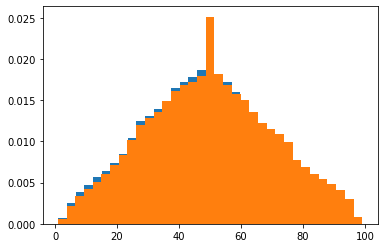

In [76]:
import matplotlib.pyplot as plt
plt.hist(present['D50_new'], bins=35, density=True)
plt.hist(future['D50_new'], bins=35, density=True)
# plt.hist(bb189['D50_new'], bins=50, density=True)

In [15]:
group_by_columns = ['Climate', 'gauge_num']
grouped_by_gauge_allevents = group_data_calc_means(df_long, 'D50_new', group_by_columns)
grouped_by_gauge_allevents_changes = find_change_values_in_groups_new(grouped_by_gauge_allevents, group_by_columns, 'All')
grouped_by_gauge_allevents_changes.to_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_changes_allevents_new.csv", index=False)

Index(['Climate_present', 'gauge_num', 'D_mean_present', 'R_present',
       'D50_mean_present', 'FL_D50_mean_present', 'BL_D50_mean_present',
       'D50_P90_present', 'D50_P10_present', 'D50_median_present',
       'F2_percentage_present', 'B2_percentage_present',
       'C_percentage_present', 'F1_percentage_present',
       'B1_percentage_present', 'Climate_future', 'D_mean_future', 'R_future',
       'D50_mean_future', 'FL_D50_mean_future', 'BL_D50_mean_future',
       'D50_P90_future', 'D50_P10_future', 'D50_median_future',
       'F2_percentage_future', 'B2_percentage_future', 'C_percentage_future',
       'F1_percentage_future', 'B1_percentage_future'],
      dtype='object')


In [18]:
grouped_by_gauge_allevents_changes[["BL_D50_mean_present", "BL_D50_mean_future"]]

,BL_D50_mean_present,BL_D50_mean_future
0,67.321853,67.486913
1,66.609936,66.313232
2,66.787212,67.511757
3,68.618093,70.207620
4,66.455403,67.646267
...,...,...
1286,66.073644,65.598679
1287,64.344502,62.618625
1288,64.906363,66.314219
1289,64.341678,65.289717


### Group by season, gauge, climate

In [80]:
group_by_columns = ['Climate', 'gauge_num', 'season']
grouped_by_gauge_season_allevents = group_data_calc_means(df_long, 'D50_new', group_by_columns)
grouped_by_gauge_season_allevents_changes = find_change_values_in_groups_new(grouped_by_gauge_season_allevents, group_by_columns, 'All')
grouped_by_gauge_season_allevents_changes.to_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_season_changes_allevents_new.csv", index=False)

Index(['Climate_present', 'gauge_num', 'season', 'D_mean_present', 'R_present',
       'D50_mean_present', 'D50_P90_present', 'D50_P10_present',
       'D50_median_present', 'F2_percentage_present', 'B2_percentage_present',
       'C_percentage_present', 'F1_percentage_present',
       'B1_percentage_present', 'Climate_future', 'D_mean_future', 'R_future',
       'D50_mean_future', 'D50_P90_future', 'D50_P10_future',
       'D50_median_future', 'F2_percentage_future', 'B2_percentage_future',
       'C_percentage_future', 'F1_percentage_future', 'B1_percentage_future'],
      dtype='object')


# Create grouped results, for all events (for each duration separately)
### Group by gauge, climate and by season, gauge, climate

In [81]:
each_dur_per_climate_changes = []
each_dur_per_climate_and_season_changes = []

# For each duration in turn
for duration in durations:
    # Get data for just this duration
    this_dur = df_long[df_long['dur_for_which_this_is_amax'].apply(
        lambda x: isinstance(x, list) and str(duration) in x or x == str(duration))]
    
    # Summary of events at each gauge, for this duration, one for present, one for future
    summary_per_climate = group_data_calc_means(this_dur, 'D50_new', ['Climate', 'gauge_num'])
    # Summary of events at each gauge, for this duration, one for each season for present, one for each season for future
    summary_per_climate_and_season = group_data_calc_means(this_dur, 'D50_new', ['Climate', 'gauge_num', 'season'])
    # Reformat, so one row per gauge, with change between present and future in the columns
    summary_per_climate_changes = find_change_values_in_groups_new(summary_per_climate, ['Climate', 'gauge_num'], float(duration))
    # Reformat, so four rows (each season) per gauge, with change between present and future in the columns
    summary_per_climate_season_changes = find_change_values_in_groups_new(summary_per_climate_and_season, ['Climate', 'gauge_num', 'season'], float(duration))
    
    ## Add to lists
    each_dur_per_climate_changes.append(summary_per_climate_changes)
    each_dur_per_climate_and_season_changes.append(summary_per_climate_season_changes)

Index(['Climate_present', 'gauge_num', 'D_mean_present', 'R_present',
       'D50_mean_present', 'D50_P90_present', 'D50_P10_present',
       'D50_median_present', 'F2_percentage_present', 'B2_percentage_present',
       'C_percentage_present', 'F1_percentage_present',
       'B1_percentage_present', 'Climate_future', 'D_mean_future', 'R_future',
       'D50_mean_future', 'D50_P90_future', 'D50_P10_future',
       'D50_median_future', 'F2_percentage_future', 'B2_percentage_future',
       'C_percentage_future', 'F1_percentage_future', 'B1_percentage_future'],
      dtype='object')
Index(['Climate_present', 'gauge_num', 'season', 'D_mean_present', 'R_present',
       'D50_mean_present', 'D50_P90_present', 'D50_P10_present',
       'D50_median_present', 'F2_percentage_present', 'B2_percentage_present',
       'C_percentage_present', 'F1_percentage_present',
       'B1_percentage_present', 'Climate_future', 'D_mean_future', 'R_future',
       'D50_mean_future', 'D50_P90_future', 'D50_P10_

In [82]:
total = pd.concat(each_dur_per_climate_changes)
total_season = pd.concat(each_dur_per_climate_and_season_changes)

In [83]:
# total[total['Circular_Uniformity_future']==True]

In [84]:
total.to_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_changes_bydur_new.csv", index=False)
total_season.to_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_season_changes_bydur_new.csv", index=False)

### Save original data
Don't do this higher up, because the json.dumps thing messes up the formatting for later stages of the code

In [85]:
# Create a copy and convert lists to JSON strings before saving - not doing this, messed up formatting a bit
df_long['dur_for_which_this_is_amax'] = df_long['dur_for_which_this_is_amax'].apply(json.dumps)
df_long.to_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics_new.csv", index=False)
df_long_with_short_durations_kept['dur_for_which_this_is_amax'] = df_long_with_short_durations_kept['dur_for_which_this_is_amax'].apply(json.dumps)
df_long_with_short_durations_kept.to_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics_shortdurationskept_new.csv", index=False)

In [86]:
h24 = future[future['dur_for_which_this_is_amax']=="24"]
h24.sort_values(by='duration', ascending=True)[:20]

,season,duration,DurationRange_personalised_allems,DurationRange_notpersonalised,DurationRange_simple,year,month,Volume,max_intensity,max_quintile_molly,...,D50_new,com,dur_for_which_this_is_amax,gauge_num,area,em,filename,max_precip,mean_precip,Climate
978043,Summer,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2074,6,6.680209,8.309624,3,...,47.661808,0.304248,24,1085,NW,bb211,24hrs_2074_v2_part1.csv,NaN,NaN,Future
436863,Summer,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2067,8,1.360277,2.292812,5,...,80.224043,0.563185,24,1113,NW,bb225,24hrs_2067_v2_part0.csv,NaN,NaN,Future
705920,Summer,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2078,7,0.250635,0.239502,5,...,64.191157,0.418216,24,1053,NE,bb204,24hrs_2078_v2_part1.csv,NaN,NaN,Future
647261,Winter,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2074,5,0.921033,0.857164,3,...,59.007985,0.417167,24,212,SW,bb204,24hrs_2074_v2_part1.csv,NaN,NaN,Future
800402,Summer,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2063,7,0.189392,0.145663,1,...,45.001142,0.300360,24,1122,NW,bb216,24hrs_2063_v2_part0.csv,NaN,NaN,Future
436872,Winter,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2075,11,0.825535,0.992539,3,...,45.038410,0.273680,24,1113,NW,bb225,24hrs_2075_v2_part1.csv,NaN,NaN,Future
953932,Winter,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2078,10,0.538574,0.682125,1,...,26.318466,0.178684,24,741,NW,bb211,24hrs_2078_v2_part1.csv,NaN,NaN,Future
194636,Summer,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2071,9,4.353807,5.931984,3,...,51.216456,0.349907,24,229,SW,bb198,24hrs_2071_v2_part1.csv,2.965992,1.451269,Future
546147,Summer,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2068,9,0.411513,0.336713,5,...,59.187146,0.407755,24,53,ME,bb201,24hrs_2068_v2_part1.csv,NaN,NaN,Future
312323,Summer,1.500000,0.25-2.10 hr,0.25-2.10 hr,<4hr,2064,7,0.382827,0.475972,3,...,48.346962,0.312781,24,634,NW,bb208,24hrs_2064_v2_part1.csv,NaN,NaN,Future


In [87]:
# row_num = 28876
# gauge_num = h24.loc[row_num]['gauge_num']
# time_period = h24.loc[row_num]['Climate']
# filename = h24.loc[row_num]['filename']
# test = pd.read_csv(home_dir2 + f"ProcessedData/IndependentEvents/UKCP18_30mins/{em}/{gauge_num}/WholeYear/EventSet/{filename}")
# test